#Build a CNN model for Bird Species classification.

#Name: Shruti Goyal
#Register Number: 20MIC0059
#Mail ID: shruti.goyal2020@vitstudent.ac.in

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"goyalshruti59","key":"f89111fd319c375a1e28f036ce6d2d31"}'}

In [10]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jun 23 09:40 kaggle.json


In [11]:
!pip install -q kaggle

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!chmod 600 /root/.kaggle/kaggle.json

In [14]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          35659        986  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           5177        142  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           7099        147  1.0              
mohithsairamreddy/salary-data 

In [15]:
!pwd

/content


In [16]:
!kaggle datasets download -d akash2907/bird-species-classification

100% 1.37G/1.37G [00:17<00:00, 152MB/s]
100% 1.37G/1.37G [00:17<00:00, 84.6MB/s]


In [17]:
!unzip bird-species-classification.zip

Archive:  bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from PIL import Image
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# Initialize data generators

train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split= 0.2

)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('/content/train_data/train_data',
                                                   target_size =(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='training')

validation_generator = train_datagen.flow_from_directory('/content/train_data/train_data',
                                                   target_size =(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')
test_generator = test_datagen.flow_from_directory('/content/test_data/test_data',
                                                   target_size =(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   )


Found 124 images belonging to 16 classes.
Found 26 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [24]:
# model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=50
                   )

Epoch 1/50
3/3 [==============================] - 31s 10s/step - loss: 2.8286 - accuracy: 0.0326
Epoch 2/50
3/3 [==============================] - 23s 7s/step - loss: 2.7696 - accuracy: 0.1667
Epoch 3/50
3/3 [==============================] - 20s 6s/step - loss: 2.6914 - accuracy: 0.1848
Epoch 4/50
3/3 [==============================] - 21s 6s/step - loss: 2.6589 - accuracy: 0.1562
Epoch 5/50
3/3 [==============================] - 20s 6s/step - loss: 2.4873 - accuracy: 0.1848
Epoch 6/50
3/3 [==============================] - 19s 6s/step - loss: 2.4139 - accuracy: 0.2174
Epoch 7/50
3/3 [==============================] - 21s 7s/step - loss: 2.4324 - accuracy: 0.2609
Epoch 8/50
3/3 [==============================] - 22s 8s/step - loss: 2.3460 - accuracy: 0.2283
Epoch 9/50
3/3 [==============================] - 19s 6s/step - loss: 2.3091 - accuracy: 0.2174
Epoch 10/50
3/3 [==============================] - 21s 7s/step - loss: 2.2894 - accuracy: 0.2283
Epoch 11/50
3/3 [=====================

In [27]:
train_generator.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [28]:
# Evaluate the model using test generator
loss, accuracy = model.evaluate(test_generator)
print(loss, accuracy)

5/5 [==============================] - 41s 8s/step - loss: 5.2476 - accuracy: 0.2803


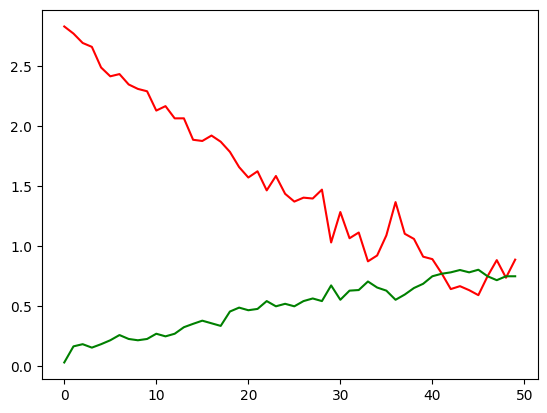

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['accuracy'],color = 'green')

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image

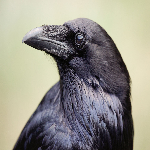

In [35]:
#Testing
img3 = image.load_img('/content/Crow.jpg',target_size=(150,150))
img3

In [32]:
#Testing Crow()
img3 = image.load_img('/content/Crow.jpg',target_size=(150,150))
print(img3)
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
np.argmax(model.predict(img3))

<PIL.Image.Image image mode=RGB size=150x150 at 0x7FB424FC3520>
1/1 [==============================] - 0s 36ms/step


15

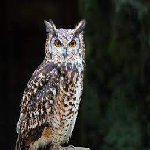

In [36]:
#Testing Owl()
img1 = image.load_img('/content/Owl.jpg',target_size=(150,150))
img1

In [37]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
np.argmax(model.predict(img1))

1/1 [==============================] - 0s 27ms/step


14

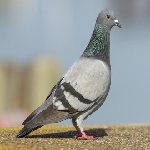

In [38]:
#Testing Pigeon()
img2 = image.load_img('/content/Pigeon.jpg',target_size=(150,150))
img2

In [39]:
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
np.argmax(model.predict(img2))

1/1 [==============================] - 0s 34ms/step


4